# BACQUET Maxime et CARON Mathieu

# TNE 2: Principal Component Analysis

The purpose of this tutorial is to use Principal Component Analysis (PCA) 
for dimension reduction applied to images.


In [1]:
from pylab import *
import numpy as np
import matplotlib.pyplot as plt

from numpy import linalg as la

## 1. Application: handwritten digits recognition 5 & 6
We load 2 matrices which contain each a sequence of examples of 16x16 images of handwritten digits which are 5 and 6 here. Each line of the matrix contains 256 pixel values coding for the gray level of a 16x16 image.

In [2]:
train_5 = np.loadtxt('train_5.txt',delimiter=',')   # 556 samples
train_6 = np.loadtxt('train_6.txt',delimiter=',')   # 664 samples

#### Examples of images:

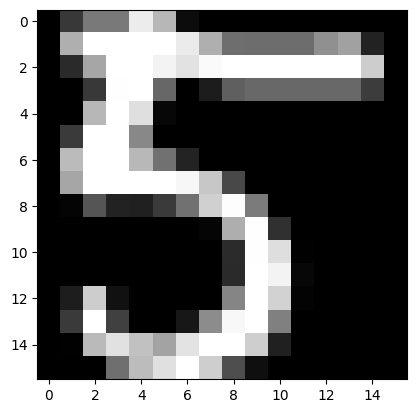

In [3]:
# Digit 5
n=9;
I = np.reshape(train_5[n,:],(16,16))

plt.imshow(I,cmap='gray')
plt.show()

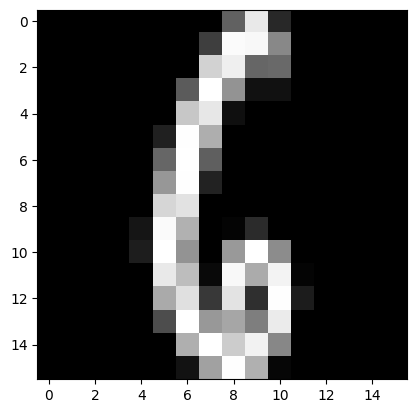

In [4]:
# Digit 6
n=5;
I = reshape(train_6[n,:],(16,16))

plt.imshow(I,cmap='gray')
plt.show()

#### Separating the training and test sets

We keep in the training set the 145 first images of 5s and the 200 first
images of 6s:

In [5]:
x_train_brut = np.vstack((train_5[:145,:], train_6[:200,:]))
N_train = np.size(x_train_brut,axis=0)
class_train = np.ones((345,1))   # label 1 for digit 6
class_train[:145] = 0       # label 0 for digit 5

x_test_brut = np.vstack((train_5[145:,:], train_6[200:,:]))
N_test = np.size(train_5,axis=0)+np.size(train_6,axis=0)-N_train

## 2. Principal Component Analysis

The purpose of this part is to observe the respective contributions of
each component of a PCA of images of 5. The function `sklearn.decomposition.PCA` of `scikit-learn` is available. In practice, one must first estimate the mean vector and then work with centered data. 

### Documentation
First have a look at
http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html
    

In [6]:
# Principal component analysis
moy_train = x_train_brut.mean(axis=0)  # all the data, 5 & 6
x_train_centre = x_train_brut-np.tile(moy_train,(N_train,1))

# PCA from scikit-learn
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(x_train_centre)  # you may forget centering that is done by sklearn PCA

singval = pca.singular_values_   # eigenvalues
comp = pca.components_           # principal components
proj = pca.transform(x_train_centre)  # computes the projection coefficients

### Display the averaged images of 5 & 6 respectively

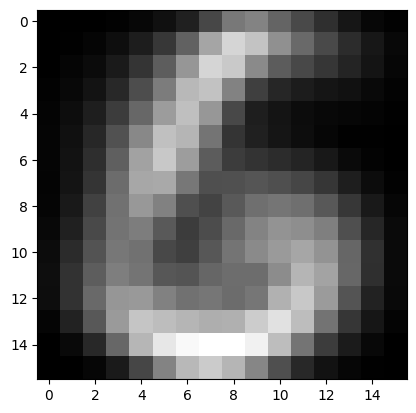

In [7]:
I_moy = np.reshape(moy_train,(16,16))   # averaged image = mean 
plt.imshow(I_moy,cmap = 'gray')
plt.show()

### Display an example rebuilt from the 1st component only

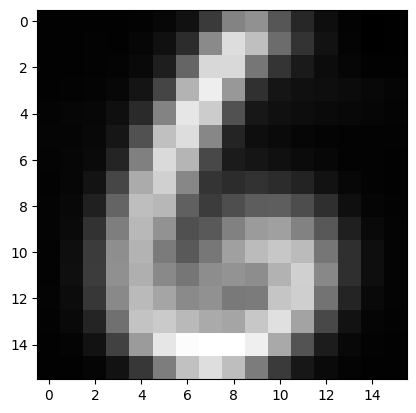

In [8]:
n=12   # choice of image no n=12 or any other

I = I_moy + proj[n,0]*np.reshape(comp[0,:],(16,16))  # adding the 1st PCA component 
plt.imshow(I,cmap='gray')
plt.show()

### Exercise 1: PCA & approximation

1. Read the documentation of function `PCA` and identify the input and output parameters.
2. Implement a progressive reconstruction of an image of digit 5 by adding the successive 
contribution of principal components.
3. Observe graphical results. How many components are necessary to obtain a 
reconstruction that you may consider as acceptable? nice? very nice?
4. Optional question: do the same for 6.


### Question 1 : documentation de la fonction PCA

#### *Paramètres d'entrée (Arguments)*

* `n_components`: Le nombre de composantes à conserver. Si ce paramètre n'est pas spécifié, tous les composantes sont conservées par défaut.
* autres paramètres optionnels tels que `copy`, `whiten`, etc.

#### *fit des données*

On a aussi besoin des données utilisées pour déterminer les composantes les plus importantes qui sont fournies par la fonction `fit`. Imaginons que notre modèle est *pca* et nos données *X*, on fait : 

```python
pca.fit(data)
```

#### *Paramètres de sortie (Valeurs renvoyées)*

* `components_`: Les directions de la projection, correspondant aux vecteurs propres de la matrice obtenue par décomposition en valeurs singulières.
* `explained_variance_`: Les valeurs propres de la matrice de covariance des données projetées (ces valeurs ne sont pas toujours utiles dans tous les contextes)
* `transform`: Une fonction permettant de projeter des données dans la nouvelle base.


### Question 2 - Implémentation d'une reconstruction progressive d'une image du chiffre 5 en ajoutant les contributions successives des composantes principales

On va définir une fonction qui permet à partir d'une image choisie de faire une reconstruction progressive en ajoutant les contributions successives des composantes principales (on en aura besoin pour cette question et la question 4 optionnel pour l'image du chiffre 6)

In [20]:
def projection_reconstruct(image_index, n_components, moyenne_train, projection, components, chiffre):
    """
    Reconstruit une image en utilisant les coefficients de projection et les composants PCA.

    Paramètres :
    - image_index : Index de l'image à reconstruire
    - n_components : Nombre de composants principaux à utiliser pour la reconstruction
    - moyenne_train : Image moyenne calculée pendant l'entraînement
    - projection : Coefficients de projection PCA
    - components : Composants principaux obtenus à partir de PCA
    - chiffre : Correspond au chiffre sur l'image que l'on va reconstruire

    Renvoie :
    None (Affiche les images reconstruites à chaque étape)
    """

    # image moyenne -> forme d'origine (16x16)
    mean_image = np.reshape(moyenne_train, (16, 16))

    # Initialisation de l'image reconstruite avec l'image moyenne
    image = np.copy(mean_image)

    # Création de la figure d'affichage
    fig, axes = plt.subplots(1, n_components + 1, figsize=(15, 2))

    # Affichage image moyenne
    axes[0].imshow(mean_image, cmap='gray')
    axes[0].set_title("Image moyenne")
    axes[0].axis('off')

    # Boucle sur le nombre spécifié de composantes
    for i in range(1, n_components + 1):
        # Mise à jour de l'image reconstruite en ajoutant la contribution de la composante actuelle
        image += projection[image_index, i - 1] * np.reshape(components[i - 1, :], (16, 16))

        # Affichage de l'image reconstruite
        axes[i].imshow(image, cmap='gray')
        axes[i].set_title(f"{i} composant{'s' if i > 1 else ''}")
        axes[i].axis('off')

    # Affichage figure
    plt.tight_layout()
    plt.savefig(f"img/reconstruction_progressive_chiffre_{chiffre}.png")
    plt.show()

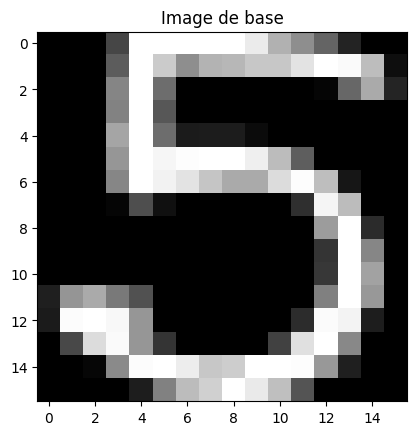

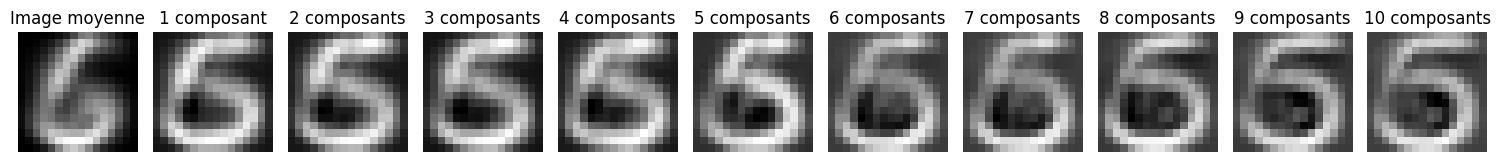

In [22]:
image_index = 2 # image correspondant a un 5

# Image de base 
im_base =  np.reshape(x_train_brut[image_index,:],(16,16))
plt.imshow(im_base,cmap='gray')
plt.title("Image de base")
plt.show()

projection_reconstruct(image_index, 10, moy_train, proj, comp, 5)

### Question 3 - Observation des résultats graphiques (combien de composantes sont nécessaires pour obtenir une reconstruction que vous pouvez considérer comme acceptable ? belle ? très belle ?)

Avec les images ci-dessus, on pourrait distinguer à l'oeil nu un 5 à partir de deux composantes (plus distinguement avec n>2 composantes). 

Cependant, cela n'est pas précis, nous allons regarder les valeurs propres en fonction du nombre de composant.

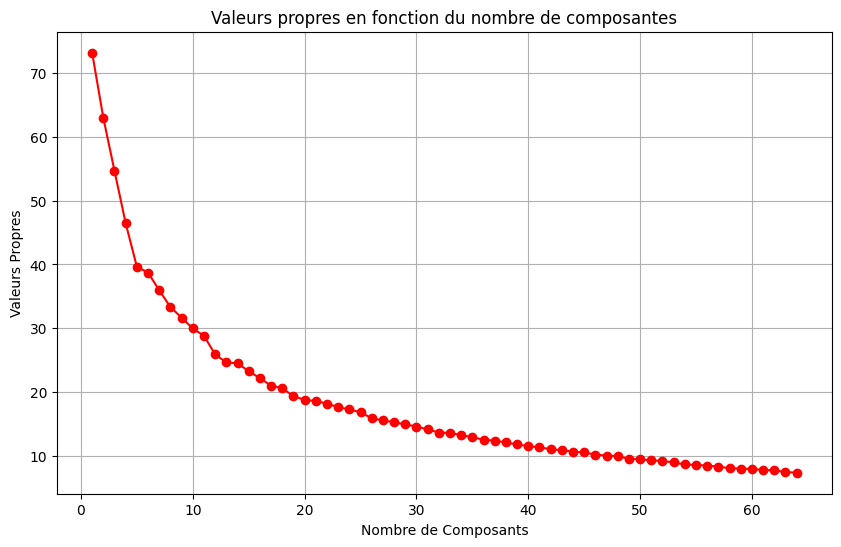

In [11]:
def plot_eigenvalues(data, n_components):
    """
    Affiche un graphique des valeurs propres en fonction du nombre de composants.

    Paramètres :
    - data : Données pour lesquelles la PCA est calculée.
    - n_components : Nombre maximal de composants à considérer.

    Renvoie :
    None (Affiche le graphique.)
    """
    pca = PCA(n_components=n_components)
    pca.fit(data)

    # Valeurs propres
    eigenvalues = pca.singular_values_

    # Affichage du graphique
    plt.figure(figsize=(10, 6))
    plt.plot(range(1, n_components + 1), eigenvalues, marker='o', linestyle='-', color='r')
    plt.title('Valeurs propres en fonction du nombre de composantes')
    plt.xlabel('Nombre de Composants')
    plt.ylabel('Valeurs Propres')
    plt.grid(True)
    plt.savefig("img/valeurs_propres_en_fonction_du_nombre_de_composantes.png")
    plt.show()

plot_eigenvalues(x_train_centre, n_components=64)

Le tracé des valeurs propres en fonction du nombre de composants permet de comprendre la contribution relative de chaque composante à la variabilité totale des données.

Tout d'abord, nous avons une décroissance des valeurs propres. Cela signifie que la première composante principale capture le plus de variabilité, la deuxième capture la deuxième plus grande quantité, et ainsi de suite.

Ensuite, l'objectif est de déterminer visuellement un "coude" sur le graphique. Ceci indiquerait le nombre de composantes que l'on jugerait suffisant pour avoir assez d'information significative. En d'autres termes, la pente de la courbe diminue après ces coudes, ce qui suggère que les composantes supplémentaires ajoutent moins d'information significative.

Cependant, ici nous ne pouvons pas réellement déterminer des coudes visuellement.

Cette méthode n'est donc pas précise, nous allons tracer la variance expliquée (explained variance) en fonction du nombre de composantes.

In [12]:
def plot_explained_variance(data, n_components):
    """
    Affiche un graphique de la variance expliquée en fonction du nombre de composantes.

    Paramètres :
    - data : Données pour lesquelles la PCA est calculée.
    - n_components : Nombre maximal de composantes à considérer.

    Renvoie :
    None (Affiche le graphique)
    """
    pca = PCA(n_components=n_components)
    pca.fit(data)

    # Calcul de la variance expliquée cumulative
    explained_variance_ratio_cumulative = np.cumsum(pca.explained_variance_ratio_)

    # Affichage du graphique
    plt.figure(figsize=(10, 6))

    # lignes pour les pourcentages 80%, 85%, 90%, et 95%
    plt.axhline(0.80, linestyle='--', color='b', label='80%')
    plt.axhline(0.85, linestyle='--', color='g', label='85%')
    plt.axhline(0.90, linestyle='--', color='purple', label='90%')
    plt.axhline(0.95, linestyle='-', color='red', label='95%')

    # indices où la variance cumulée dépasse 80%, 85%, 90%, et 95%
    index_above_80 = np.argmax(explained_variance_ratio_cumulative > 0.80)
    index_above_85 = np.argmax(explained_variance_ratio_cumulative > 0.85)
    index_above_90 = np.argmax(explained_variance_ratio_cumulative > 0.90)
    index_above_95 = np.argmax(explained_variance_ratio_cumulative > 0.95)

    # ajout des lignes pointillées  pour les pourcentages spécifiés
    plt.axvline(x=index_above_80 + 1, linestyle='--', color='g')
    plt.axvline(x=index_above_85 + 1, linestyle='--', color='purple')
    plt.axvline(x=index_above_90 + 1, linestyle='--', color='orange')
    plt.axvline(x=index_above_95 + 1, linestyle='-', color='red')

    # ajout des annotations avec les valeurs spécifiques sur le bas du graphique
    plt.annotate(f'80%: x={index_above_80 + 1}', xy=(0.2, -0.15), xycoords="axes fraction", ha="center", color='g')
    plt.annotate(f'85%: x={index_above_85 + 1}', xy=(0.4, -0.15), xycoords="axes fraction", ha="center", color='purple')
    plt.annotate(f'90%: x={index_above_90 + 1}', xy=(0.6, -0.15), xycoords="axes fraction", ha="center", color='orange')
    plt.annotate(f'95%: x={index_above_95 + 1}', xy=(0.8, -0.15), xycoords="axes fraction", ha="center", color='red')
    
    plt.plot(range(1, n_components + 1), explained_variance_ratio_cumulative, marker='o', linestyle='-', color='b')
    plt.title('Variance expliquée cumulative en fonction du nombre de composantes')
    plt.xlabel('Nombre de composantes')
    plt.ylabel('Variance expliquée cumulative')
    plt.legend()
    plt.grid(True)
    plt.savefig(f"img/explained_variance_cumulative_{n_components}_composantes.png")
    plt.show()

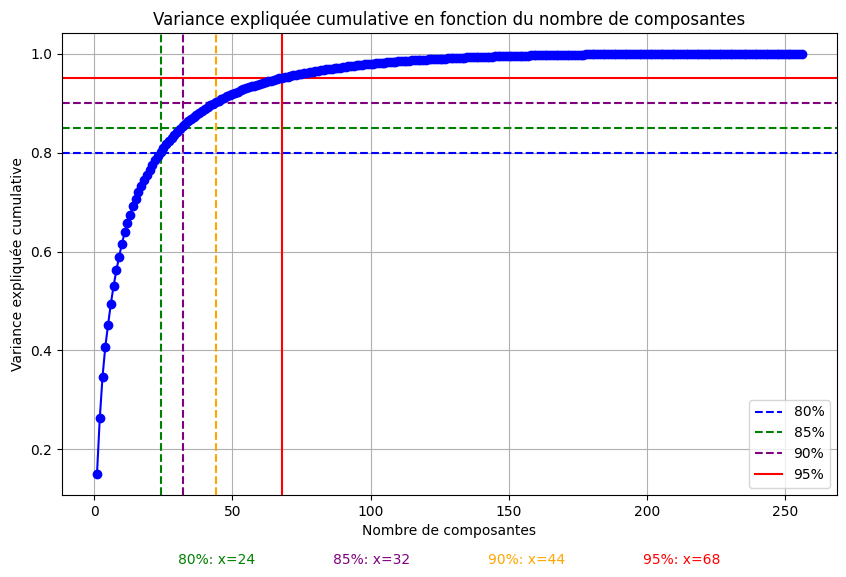

In [13]:
# Affichage du graphique de la variance expliquée pour le nombre total de composantes (256)
plot_explained_variance(x_train_centre, n_components=256)

On observe bien que la variance est 1 pour le nombre de composantes qui est égale à la dimension de base. Pour une meilleure visualisation, on va afficher pour 80 composantes :

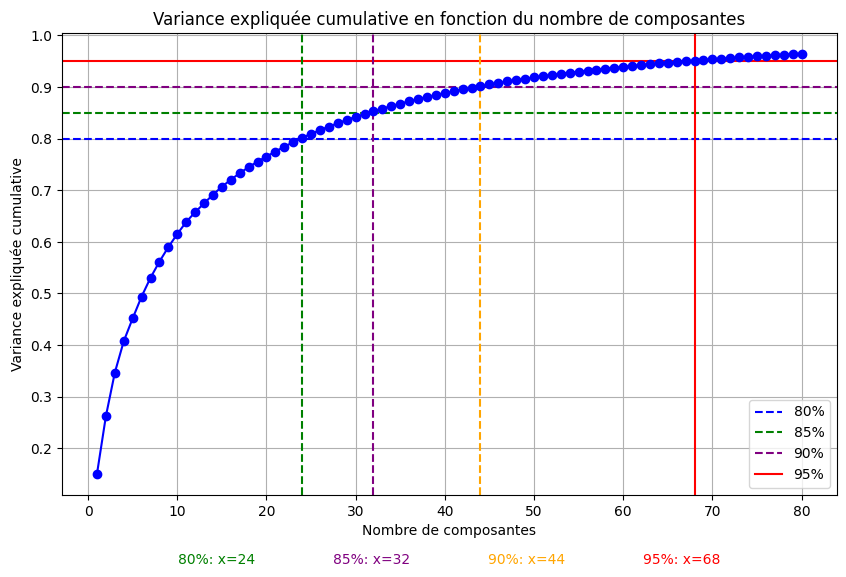

In [14]:
# Affichage du graphique de la variance expliquée pour 80 composantes
plot_explained_variance(x_train_centre, n_components=80)

De ce graphique, on peut déduire que si nous voulons garder 95% de la variance expliquée, il faut choisir 68 composantes pour la PCA. Ce nombre reste encore très élévé, on peut donc essayer de chercher un compromis entre le nombre de composantes (qu'on veut minimiser) et la variance expliquée cumulative (qu'on veut maximiser).

Dans notre cas, on pourrait garder seulement 80% de la variance expliquée ce qui nous donnerait 24 composantes principales.

##### *Étude du compromis nombre de composantes / variance expliquée*

Afin de déterminer si ce compromis est bon, nous pourrions évaluer nos modèles avec :
- 24 composantes (80%)
- 32 composantes (85%)
- 44 composantes (90%)
- 68 composantes (95%)

L'objectif serait de voir si nous avons par exemple une nette augmentation de la précision de nos modèles lorsqu'on passe de 80% d'explained variance à 85%, 90% ou 95%. Si nous jugons que cette augmentation est faible nous pouvons donc garder 80% car ceci nous permet ensuite d'avoir que 24 composantes et donc de réduire grandement la dimension (et donc la charge de calcul)

Regardons en évaluant les performances avec un model tel que RandomForest :

C:\Users\mathc\AppData\Local\Temp\ipykernel_1576\4219621768.py:26: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(x_train_pca, class_train)


Avec 24 composantes : Précision du modèle = 0.9554


C:\Users\mathc\AppData\Local\Temp\ipykernel_1576\4219621768.py:26: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(x_train_pca, class_train)


Avec 32 composantes : Précision du modèle = 0.9520


C:\Users\mathc\AppData\Local\Temp\ipykernel_1576\4219621768.py:26: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(x_train_pca, class_train)


Avec 44 composantes : Précision du modèle = 0.9509


C:\Users\mathc\AppData\Local\Temp\ipykernel_1576\4219621768.py:26: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(x_train_pca, class_train)


Avec 68 composantes : Précision du modèle = 0.9554


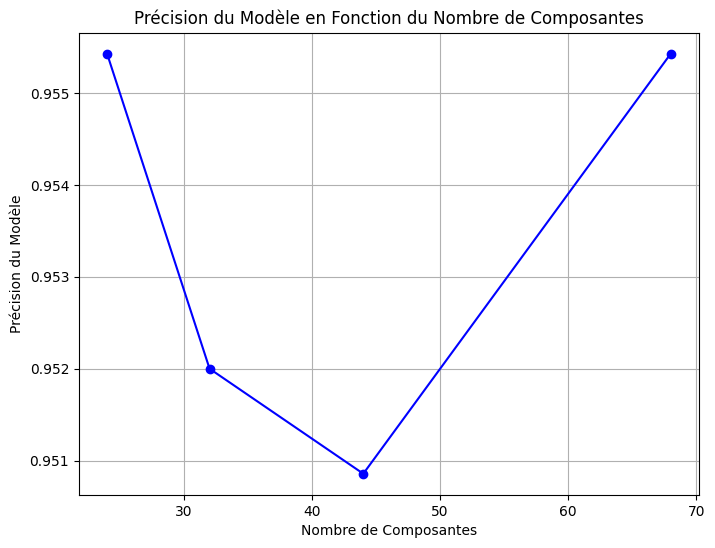

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

moy_test = x_test_brut.mean(axis=0)
x_test_centre = x_test_brut - np.tile(moy_test, (N_test,1))

class_test = np.ones((875,1)) # Label des 6
class_test[:411] = 0 # Label des 5

# Configurations de composantes à évaluer
components_to_evaluate = [24, 32, 44, 68]

# Stockage des résultats de performance
accuracy_results = []

# Boucle sur différentes configurations de composantes
for n_components in components_to_evaluate:
    # On applique la PCA sur les données d'entraînement
    pca = PCA(n_components=n_components)
    x_train_pca = pca.fit_transform(x_train_centre)

    # Création et entraînement d'un modèle (on a choisit RandomForestClassifier)
    model = RandomForestClassifier(random_state=42)
    model.fit(x_train_pca, class_train)

    # PCA sur les données de test
    x_test_pca = pca.transform(x_test_centre)

    # Prédictions sur les données de test
    y_pred = model.predict(x_test_pca)

    # Évaluation de la précision du modèle
    accuracy = accuracy_score(class_test, y_pred)
    accuracy_results.append(accuracy)

    print(f"Avec {n_components} composantes : Précision du modèle = {accuracy:.4f}")

# Affichage des résultats
plt.figure(figsize=(8, 6))
plt.plot(components_to_evaluate, accuracy_results, marker='o', linestyle='-', color='b')
plt.title('Précision du Modèle en Fonction du Nombre de Composantes')
plt.xlabel('Nombre de Composantes')
plt.ylabel('Précision du Modèle')
plt.grid(True)
plt.savefig("img/precision_du_modele_en_fonction_du_nombre_de_composantes.png")
plt.show()


On s'aperçoit bien qu'en choississant 24 composantes (c'est à dire "seulement" 80% de variance expliquée), on a tout de mêmes des performances similaires lorsqu'on utilise un modèle comme RandomForest. Nous allons donc garder 24 composantes.

En conclusion, nous avons montré l'intérêt d'utiliser la PCA : réduire la dimension du problème (et donc la charge de calcul) tout en conservant au maximum la variance expliquée.

### Question 4 - Optional - Faire la même chose pour 6

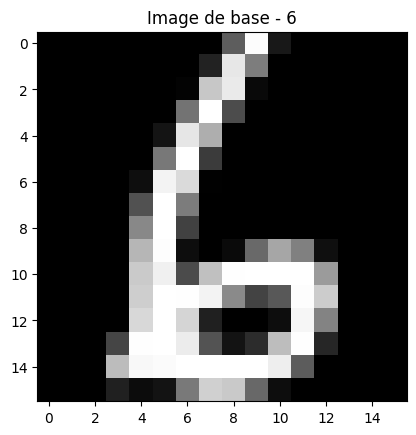

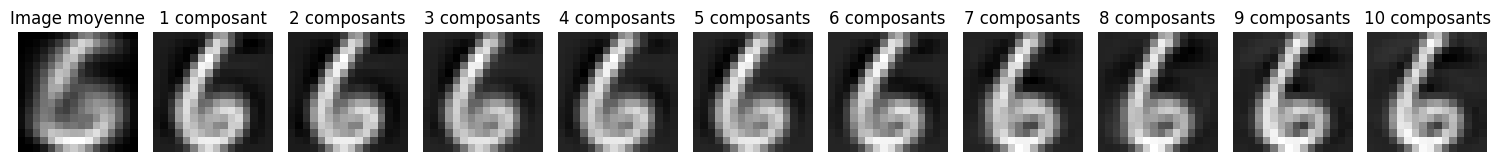

In [29]:
image_index = 147 # image correspondant a un 6

# Image de base 
im_base =  np.reshape(x_train_brut[image_index,:],(16,16))
plt.imshow(im_base,cmap='gray')
plt.title("Image de base - 6")
plt.show()

projection_reconstruct(image_index, 10, moy_train, proj, comp, 6)

On voit bien la même chose que pour le chiffre 5 (avec 10 composantes on distingue bien à l'oeil nu un 6, donc en choississant 24 composantes, ceci sera encore plus précis)

### Exercise 2: PCA & classification
1. Use `proj[0:2,:]` as the coordinates of a point representing each sample
of the training set in a plane. Display the cloud of points associated to
digits 5 and 6 by using 2 different colors.
2. Comment on the repartition of points in the plane. 
3. Do you see how this PCA step makes possible the use of a much simpler classification? 
What would you propose as an alternative to logistic regression of TP3 then?


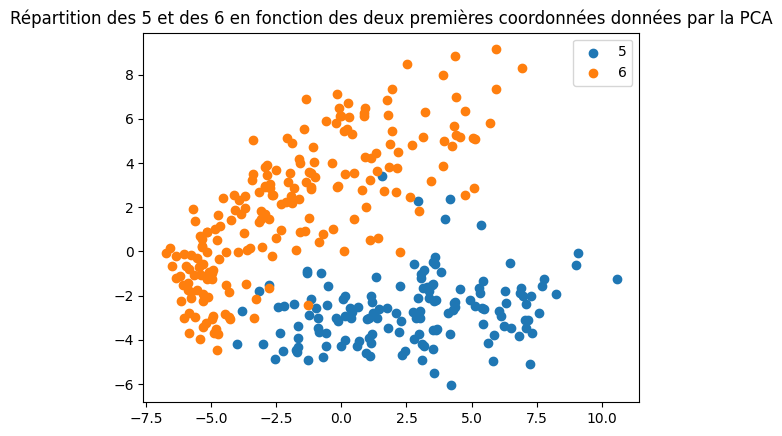

In [31]:
# Exercise 2
plt.title("Répartition des 5 et des 6 en fonction des deux premières coordonnées données par la PCA")
plt.scatter(proj[:145, 0], proj[:145, 1])
plt.scatter(proj[145:, 0], proj[145:, 1])
plt.legend(["5", "6"])
plt.savefig("img/repartition_des_5_et_6_en_fonction_des_deux_premieres_coordonnées_données_par_la_PCA.png")
plt.show()

Les données présentent une quasi-séparabilité linéaire. En conséquence, nous présumons que l'utilisation de la LDA donnerait également des résultats satisfaisants. Comme nous l'avons démontré dans le TP3, la LDA est sensible aux outliers, mais il semble qu'il n'y en ait pas beaucoup dans cet ensemble d'entraînement, ce qui renforce notre affirmation.

Pour mettre en évidence ceci, nous ferons usage de la QDA et de la LDA. Nous réduirons la dimension à 2 pour faciliter la visualisation du résultat.

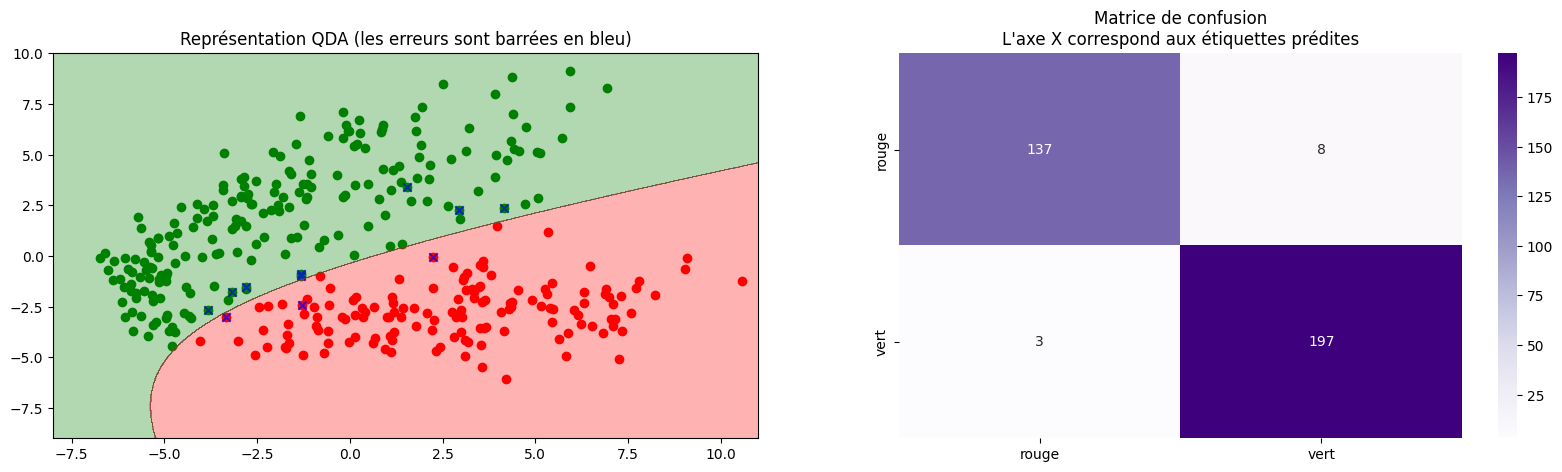

Le taux d'erreur pour la QDA à 2 dimensions est de : 3.1884057971014457 %.


In [33]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.metrics import zero_one_loss

def QDA_Analyser(function):
    test_data =  proj[:, 0:2]
    class_train = np.ones((345,)) # label 1 for digit 6
    class_train[:145] = 0 # label 0 for digit 5
    function.fit(test_data, class_train)

    x1_bounds, x2_bounds = (-8, 11), (-9, 10)
    plt.figure(figsize=(20, 5))

    plt.subplot(121)
    prediction = function.predict(test_data)
    mauvaise_prediction = np.logical_or(
        np.logical_and(prediction[:] == 1, class_train[:] == 0),
        np.logical_and(prediction[:] == 0, class_train[:] == 1),
    )
    errors = test_data[mauvaise_prediction, :]
    x_predicted_0 = test_data[prediction[:] == 0, :]
    x_predicted_1 = test_data[prediction[:] == 1, :]

    plt.scatter(x_predicted_0[:, 0], x_predicted_0[:, 1], c="r")
    plt.scatter(x_predicted_1[:, 0], x_predicted_1[:, 1], c="g")
    plt.scatter(errors[:, 0], errors[:, 1], c="b", marker="x")
    plt.title("Représentation QDA (les erreurs sont barrées en bleu)")

    x1 = np.linspace(x1_bounds[0], x1_bounds[1], 1000)
    x2 = np.linspace(x2_bounds[0], x2_bounds[1], 1000)
    X1, X2 = np.meshgrid(x1, x2)

    X = np.column_stack((np.ravel(X1), np.ravel(X2)))
    Z = function.predict(X).reshape(X1.shape)

    plt.contourf(X1, X2, Z, colors=["r", "g", "b", "y", "purple"], alpha=0.3)

    plt.subplot(122)
    plt.title("Matrice de confusion\nL'axe X correspond aux étiquettes prédites")

    sns.heatmap(
        confusion_matrix(class_train, prediction),
        annot=True,
        fmt="d",
        cmap=plt.cm.Purples,
        xticklabels=["rouge", "vert"],
        yticklabels=["rouge", "vert"],
    )
    loss = zero_one_loss(class_train, prediction)
    plt.savefig("img/representation_QDA_et_matrice_confusion.png")
    plt.show()
    print(f"Le taux d'erreur pour la QDA à 2 dimensions est de : {loss * 100} %.")

QDA_Analyser(QuadraticDiscriminantAnalysis())


Les résultats obtenus avec la QDA sont très satisfaisants en dimension 2, nous pouvons les comparer à la LDA :

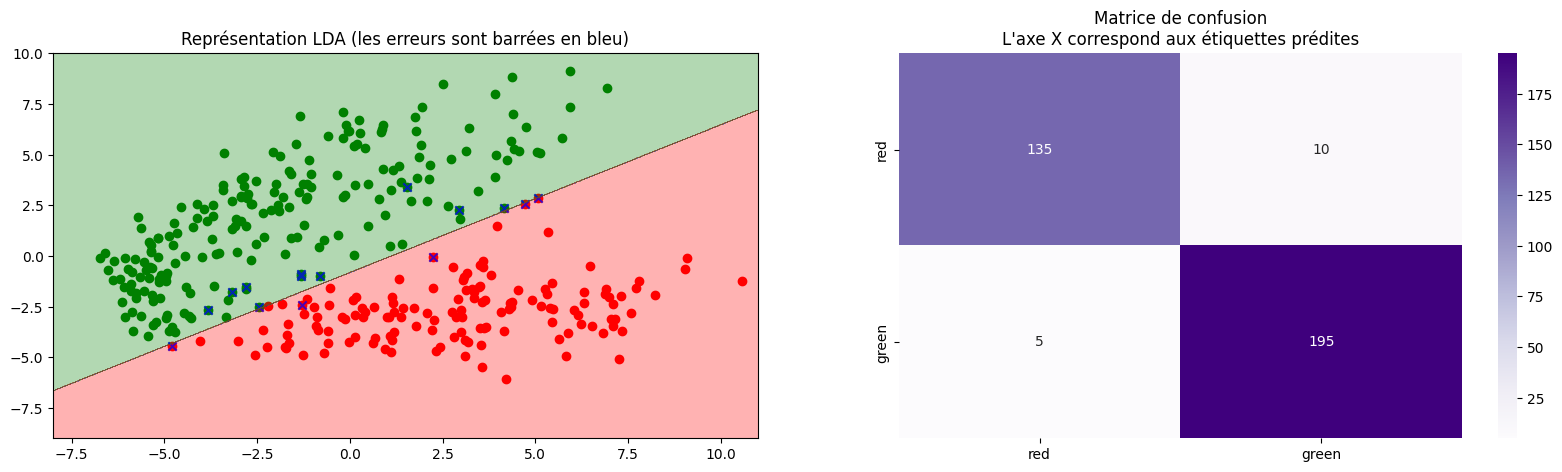

Le taux d'erreur pour la LDA à 2 dimensions est de : 4.347826086956519 %.


In [36]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

def LDA_Analyser(function):
    test_data = np.hstack([np.ones((345,1)), proj[:, 0:2]])
    class_train = np.ones((345,)) # label 1 for digit 6
    class_train[:145] = 0 # label 0 for digit 5
    function.fit(test_data, class_train)

    x1_bounds, x2_bounds = (-8,11), (-9,10)
    plt.figure(figsize=(20,5))

    plt.subplot(121)
    prediction = function.predict(test_data)
    mauvaise_prediction =  np.logical_or(np.logical_and(prediction[:] == 1, class_train[:] == 0), np.logical_and(prediction[:] == 0, class_train[:] == 1))
    errors = test_data[mauvaise_prediction, :][:,1:]
    x_predicted_0 = test_data[prediction[:] == 0, :][:,1:]
    x_predicted_1 = test_data[prediction[:] == 1, :][:,1:]

    plt.scatter(x_predicted_0[:,0], x_predicted_0[:,1], c='r')
    plt.scatter(x_predicted_1[:,0], x_predicted_1[:,1], c='g')
    plt.scatter(errors[:,0], errors[:,1], c='b', marker = 'x')
    plt.title("Représentation LDA (les erreurs sont barrées en bleu)")

    x1 = np.linspace(x1_bounds[0], x1_bounds[1], 1000) 
    x2 = np.linspace(x2_bounds[0], x2_bounds[1], 1000) 
    X1, X2 = meshgrid(x1,x2)

    X = np.stack((np.ones(1000**2), np.ravel(X1), np.ravel(X2))).T
    Z = function.predict(X).reshape(X1.shape)

    plt.contourf(X1, X2, Z, colors=['r', 'g', 'b', "y", 'purple'], alpha = 0.3)

    plt.subplot(122)
    plt.title("Matrice de confusion\nL'axe X correspond aux étiquettes prédites")

    sns.heatmap(confusion_matrix(class_train, prediction), annot=True, fmt='d', cmap=plt.cm.Purples, xticklabels=['red', 'green'], yticklabels=['red', 'green'])      
    loss = zero_one_loss(class_train, prediction)
    plt.savefig("img/representation_LDA_et_matrice_confusion.png")
    plt.show()
    print(f"Le taux d'erreur pour la LDA à 2 dimensions est de : {loss * 100} %.")

LDA_Analyser(LinearDiscriminantAnalysis())

On peut voir que les résultats obtenus avec la QDA sont meilleurs que ceux obtenus avec la LDA, mais ces derniers sont tout de même assez satisfaisants pour valider notre hypothèse de départ. Les modèles de QDA et LDA semblent donc être une bonne alternative à la régression logistique.

In [37]:
lda = LinearDiscriminantAnalysis()
lda.fit(x_train_brut, class_train)
prediction = lda.predict(x_train_brut)
loss = zero_one_loss(class_train, prediction)
print(f"The error rate for LDA with 256 dimensions is {loss * 100} %.")

qda = QuadraticDiscriminantAnalysis()
qda.fit(x_train_brut, class_train)
prediction = qda.predict(x_train_brut)
loss = zero_one_loss(class_train, prediction)
print(f"The error rate for QDA with 256 dimensions is {loss * 100} %.")

c:\Users\mathc\AppData\Local\Programs\Python\Python38-32\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
c:\Users\mathc\AppData\Local\Programs\Python\Python38-32\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
c:\Users\mathc\AppData\Local\Programs\Python\Python38-32\lib\site-packages\sklearn\discriminant_analysis.py:808: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


The error rate for LDA with 256 dimensions is 0.0 %.
The error rate for QDA with 256 dimensions is 0.0 %.



Dans ce cas, la prédiction s'avère plus précise avec 256 dimensions qu'avec seulement 2 dimensions, conformément à ce que l'on pouvait anticiper. On constate même que le classificateur ne commet aucune erreur, démontrant ainsi que dans un espace de 256 dimensions, les données sont totalement séparables de manière linéaire : cela confirme l'hypothèse formulée grâce à la PCA en deux dimensions.

Pour résumer, une application de l'Analyse en Composantes Principales (PCA) consiste à effectuer une analyse préalable du jeu de données, nous permettant de mieux visualiser nos données (dans un espace de dimension réduit), facilitant ainsi le choix d'un algorithme d'apprentissage. Dans l'exemple précédent, on a pu vérifier si les données peuvent être séparées linéairement grâce à la PCA.

## Beyong this lab

Have a look at other examples of applications, like

http://scikit-learn.org/stable/auto_examples/decomposition/plot_faces_decomposition.html#sphx-glr-auto-examples-decomposition-plot-faces-decomposition-py
    